In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
sites_data = pd.read_csv("~data/feature_extraction_15x15.csv")
sites_data['time'] = pd.to_datetime(sites_data['time'])

In [32]:
sites_with_region = pd.read_csv('~data/site.csv')
sites_data = sites_data.merge(site_with_region[['EUBWID', 'region']], how='left', left_on='site', right_on='EUBWID')
sites_data

,time,site,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,CDM_1x1_mean,...,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3,EUBWID,region
0,2020-01-01,ukc1101-06000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukc1101-06000,North East
1,2020-01-01,ukc1101-06100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukc1101-06100,North East
2,2020-01-01,ukc1101-06200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukc1101-06200,North East
3,2020-01-01,ukc1202-06300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.414686,2.392838,NaN,NaN,2.355747,0.164187,4.705874,2.620098,ukc1202-06300,North East
4,2020-01-01,ukc1202-06400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.552876,2.188390,NaN,NaN,2.351558,0.159994,5.009740,2.510444,ukc1202-06400,North East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471275,2022-12-31,ukk4306-22800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukk4306-22800,South West
471276,2022-12-31,ukk4306-22900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukk4306-22900,South West
471277,2022-12-31,ukk4306-23000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukk4306-23000,South West
471278,2022-12-31,ukk4307-33800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ukk4307-33800,South West


In [33]:
sites_data['region'].value_counts()

region
South West                  224680
South East                   93160
East of England              43840
North East                   37264
North West                   33976
Yorkshire and The Humber     25208
East Midlands                 8768
London                        4384
Name: count, dtype: int64

In [46]:
# By Year

by_year = []

for var in ['BBP', 'CDM', 'CHL', 'KD490','SPM','ZSD']:

    avg_2020 = sites_data[sites_data['time'] <= '2020-12-31'][f'{var}_15x15_mean'].mean()
    avg_2021 = sites_data[(sites_data['time'] <= '2021-12-31') & (sites_data['time'] >= '2021-01-01')][f'{var}_15x15_mean'].mean()
    avg_2022 = sites_data[sites_data['time'] >= '2022-01-01'][f'{var}_15x15_mean'].mean()

    by_year.append([avg_2020, avg_2021, avg_2022])


In [73]:
df = pd.DataFrame(by_year)
df = df.T
df

,0,1,2,3,4,5
0,0.026070,0.234013,4.362681,0.210231,14.359116,4.496439
1,0.023191,0.197134,3.973222,0.197023,10.414880,4.982777
2,0.026045,0.188559,3.922777,0.196980,12.570922,4.901460


In [74]:
df_pct_change = (df - df.iloc[0]) / df.iloc[0] * 100
df_pct_change.columns = ['BBP', 'CDM', 'CHL', 'KD490','SPM','ZSD']
df_pct_change

,BBP,CDM,CHL,KD490,SPM,ZSD
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-11.045571,-15.759111,-8.927054,-6.282640,-27.468517,10.816077
2,-0.096638,-19.423499,-10.083348,-6.303006,-12.453368,9.007613


<Figure size 800x480 with 0 Axes>

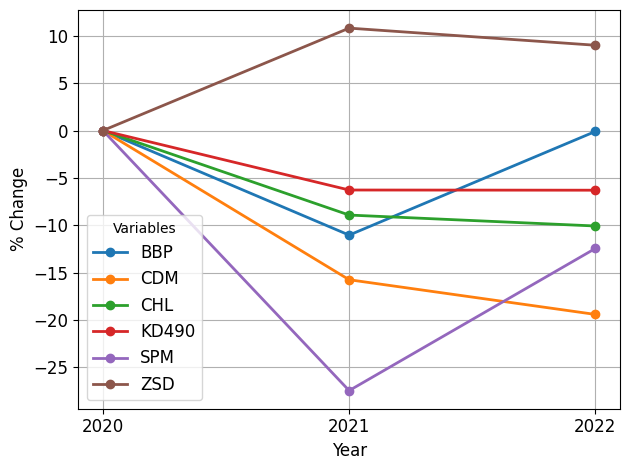

In [76]:
# Plotting the graph
plt.figure(figsize=(8, 4.8))
ax = df_pct_change.plot(kind='line', marker='o', fontsize=12, linewidth=2)

# Customize x-axis
ax.set_xticks(range(len(df_pct_change)))
ax.set_xticklabels([2020, 2021, 2022])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel('Year', fontsize=12)

# Customize y-axis
ax.set_ylabel('% Change', fontsize=12)

# Customize title and legend
ax.legend(title='Variables', fontsize=12)

# Show grid
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("percent_change_by_year.pdf")
plt.show()

In [77]:
# By Month

by_month = []

for var in ['SPM','CHL', 'ZSD', 'KD490', 'BBP','CDM']:

    avg_may = sites_data[sites_data['time'].dt.month==5][f'{var}_15x15_mean'].mean()
    avg_jun = sites_data[sites_data['time'].dt.month==6][f'{var}_15x15_mean'].mean()
    avg_jul = sites_data[sites_data['time'].dt.month==7][f'{var}_15x15_mean'].mean()
    avg_aug = sites_data[sites_data['time'].dt.month==8][f'{var}_15x15_mean'].mean()
    avg_sep = sites_data[sites_data['time'].dt.month==9][f'{var}_15x15_mean'].mean()

    by_month.append([avg_may, avg_jun, avg_jul, avg_aug, avg_sep])


In [78]:
df = pd.DataFrame(by_month)
df = df.T

In [79]:
df_pct_change = (df - df.iloc[0]) / df.iloc[0] * 100
df_pct_change.columns = ['BBP', 'CDM', 'CHL', 'KD490','SPM','ZSD']
df_pct_change

,BBP,CDM,CHL,KD490,SPM,ZSD
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-14.618885,-28.001492,19.242910,-18.282583,-16.893345,-30.046028
2,-14.354699,-38.872963,25.207665,-25.217935,-10.613622,-33.753947
3,5.313981,-36.349418,15.062195,-22.553048,-4.646817,-39.830234
4,22.598390,-30.387186,7.022884,-17.866676,-1.021076,-38.623077


<Figure size 800x480 with 0 Axes>

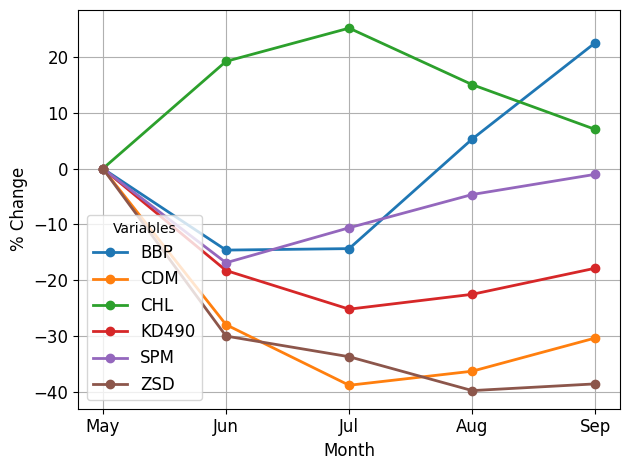

In [83]:
# Plotting the graph
plt.figure(figsize=(8, 4.8))
ax = df_pct_change.plot(kind='line', marker='o', fontsize=12, linewidth=2)

# Customize x-axis
ax.set_xticks(range(len(df_pct_change)))
ax.set_xticklabels(["May", "Jun","Jul","Aug","Sep"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel('Month', fontsize=12)

# Customize y-axis
ax.set_ylabel('% Change', fontsize=12)

# Customize title and legend
ax.legend(title='Variables', loc="lower left", fontsize=12)

# Show grid
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("percent_change_by_month.pdf", dpi=300)
plt.show()

In [84]:
# By Region

by_region = []

for var in ['BBP', 'CDM', 'CHL', 'KD490','SPM','ZSD']:

    avg_sw = sites_data[sites_data['region'] == 'South West'][f'{var}_15x15_mean'].mean()
    avg_se = sites_data[sites_data['region'] == 'South East'][f'{var}_15x15_mean'].mean()
    avg_ee = sites_data[sites_data['region'] == 'East of England'][f'{var}_15x15_mean'].mean()
    avg_ne = sites_data[sites_data['region'] == 'North East'][f'{var}_15x15_mean'].mean()
    avg_nw = sites_data[sites_data['region'] == 'North West'][f'{var}_15x15_mean'].mean()
    avg_yh = sites_data[sites_data['region'] == 'Yorkshire and The Humber'][f'{var}_15x15_mean'].mean()
    avg_em = sites_data[sites_data['region'] == 'East Midlands'][f'{var}_15x15_mean'].mean()
    avg_ld = sites_data[sites_data['region'] == 'London'][f'{var}_15x15_mean'].mean()

    by_region.append([avg_sw, avg_se, avg_ee, avg_ne, avg_nw, avg_yh, avg_em, avg_ld])


In [89]:
df = pd.DataFrame(by_region)
df = df.T
df.columns = ['BBP', 'CDM', 'CHL', 'KD490','SPM','ZSD']
df

,BBP,CDM,CHL,KD490,SPM,ZSD
0,0.014328,0.143932,2.724366,0.156548,5.725549,6.082066
1,0.039942,0.250410,4.625808,0.222752,17.231860,3.732504
2,0.049743,0.312115,7.399352,0.304337,35.709504,2.571361
3,0.012192,0.190372,4.105713,0.202241,4.106213,4.691165
4,0.034214,0.330201,6.591150,0.282651,20.948046,2.758964
5,0.018904,0.203670,4.426075,0.215871,10.444346,4.191661
6,0.045008,0.387455,8.416313,0.329605,35.920901,2.408600
7,NaN,NaN,NaN,NaN,NaN,NaN


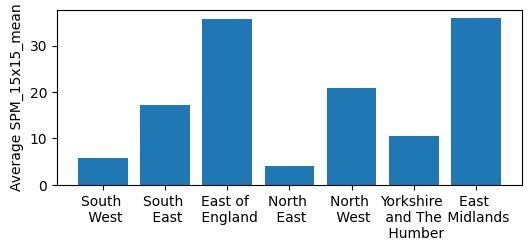

In [110]:
plt.figure(figsize=(6, 2.4))
plt.bar(['South \n West','South \n East', 'East of \n England', 'North \n East', 'North \n West', 'Yorkshire \n and The \n Humber', 'East \n Midlands', 'London'], df['SPM'])
plt.ylabel("Average SPM_15x15_mean")
plt.subplots_adjust(bottom=0.15)
plt.savefig("spm_by_region.pdf", bbox_inches="tight")

plt.show()